In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_test_ask.csv')

In [3]:
sns.set(rc={'figure.figsize':(40,25)})

In [4]:
dff = df.copy()

In [20]:
rg = dff.query("approved == 0")

In [22]:
rg

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40000,0,0.0,3000,600,0.0,0.0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23000,0,0.0,0,10000,0.0,0.0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,18000,3,0.0,10000,10000,0.1,10000.0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313000,0,0.0,0,10000,0.0,0.0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,10000,0.0,0.0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23110,6697091,0.0,0,0,2,0.0,9000,10000,0.0,1000.0,...,0.0,0,0.00,0,0,3,20000,60,NaN,0
23111,6697173,0.0,0,0,3,0.0,0,700,0.0,0.0,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
23112,6697212,0.0,1,25000,3,9500.0,18000,0,0.0,0.0,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
23113,6697215,1000.0,0,64000,2,0.0,1000,400,0.0,0.0,...,0.0,0,0.00,0,0,4,35000,94,NaN,0


In [14]:
dff[['all_closed_creds_sum_all', 'all_active_creds_sum_all', 'cred_sum_debt_all_all', ]] = dff[['all_closed_creds_sum_all', 'all_active_creds_sum_all', 'cred_sum_debt_all_all', ]].round(decimals=-3)
dff[['mfo_last_days_all', 'cred_max_overdue_max_3lm', 'cred_day_overdue_all_sum_all']] = dff[['mfo_last_days_all', 'cred_max_overdue_max_3lm', 'cred_day_overdue_all_sum_all']].round(decimals=-2)

In [ ]:
#dff.value_counts()

In [7]:
#df.iloc[:100, 1:] #первая сотня строк без id

In [6]:
bad = np.where(dff['bad'] == 1)[0] #1963

In [7]:
good = np.where(dff['bad'] == 0)[0] #5306

In [8]:
approved = np.where(dff['approved'] == 1)[0] #7269

In [9]:
df.shape

(23116, 25)

In [11]:
#df.iloc[list(np.where(dff['all_active_creds_sum_all'] == dff['cred_sum_debt_all_all'])[0])]#8675 всего #корр = 1 у "денежная сумма всех активных кредитов" и "Сумма задолженности по всем кредитам"


In [9]:
not_a_single_payment = np.where((dff['all_active_creds_sum_all'] == dff['cred_sum_debt_all_all']))[0]

In [ ]:
df.iloc[list(np.where(  df.iloc[not_a_single_payment]['approved'] == 1)[0])].describe()

In [91]:
zvezda = df.iloc[list(np.where(df['bad'] == 1)[0])]
zvezda[[
    'all_active_creds_sum_all',
    'all_closed_creds_sum_all',
    'mfo_cred_mean_sum_3lm',
    'all_closed_creds_sum_ly',
    'mfo_inqs_count_month',
    'all_creds_count_lm',
    'cred_sum_cc_ly'
]].mean()

all_active_creds_sum_all    205788.184921
all_closed_creds_sum_all    228474.521651
mfo_cred_mean_sum_3lm         7890.958239
all_closed_creds_sum_ly      60047.396332
mfo_inqs_count_month             2.511462
all_creds_count_lm               2.477331
cred_sum_cc_ly               25991.866516
dtype: float64

***

Посмотреть delay_more_sum_all и all_creds_count_all

In [149]:
xer = dff.iloc[list(np.where(dff['all_creds_count_all'] == 1))[0]]

In [150]:
xer.shape

(3067, 25)

In [177]:
df[['all_creds_count_all', 'approved']].value_counts()

all_creds_count_all  approved
1                    0           2967
2                    0           2315
3                    0           1684
4                    0           1351
5                    0           1109
                                 ... 
125                  0              1
124                  1              1
123                  1              1
120                  0              1
546                  1              1
Length: 289, dtype: int64

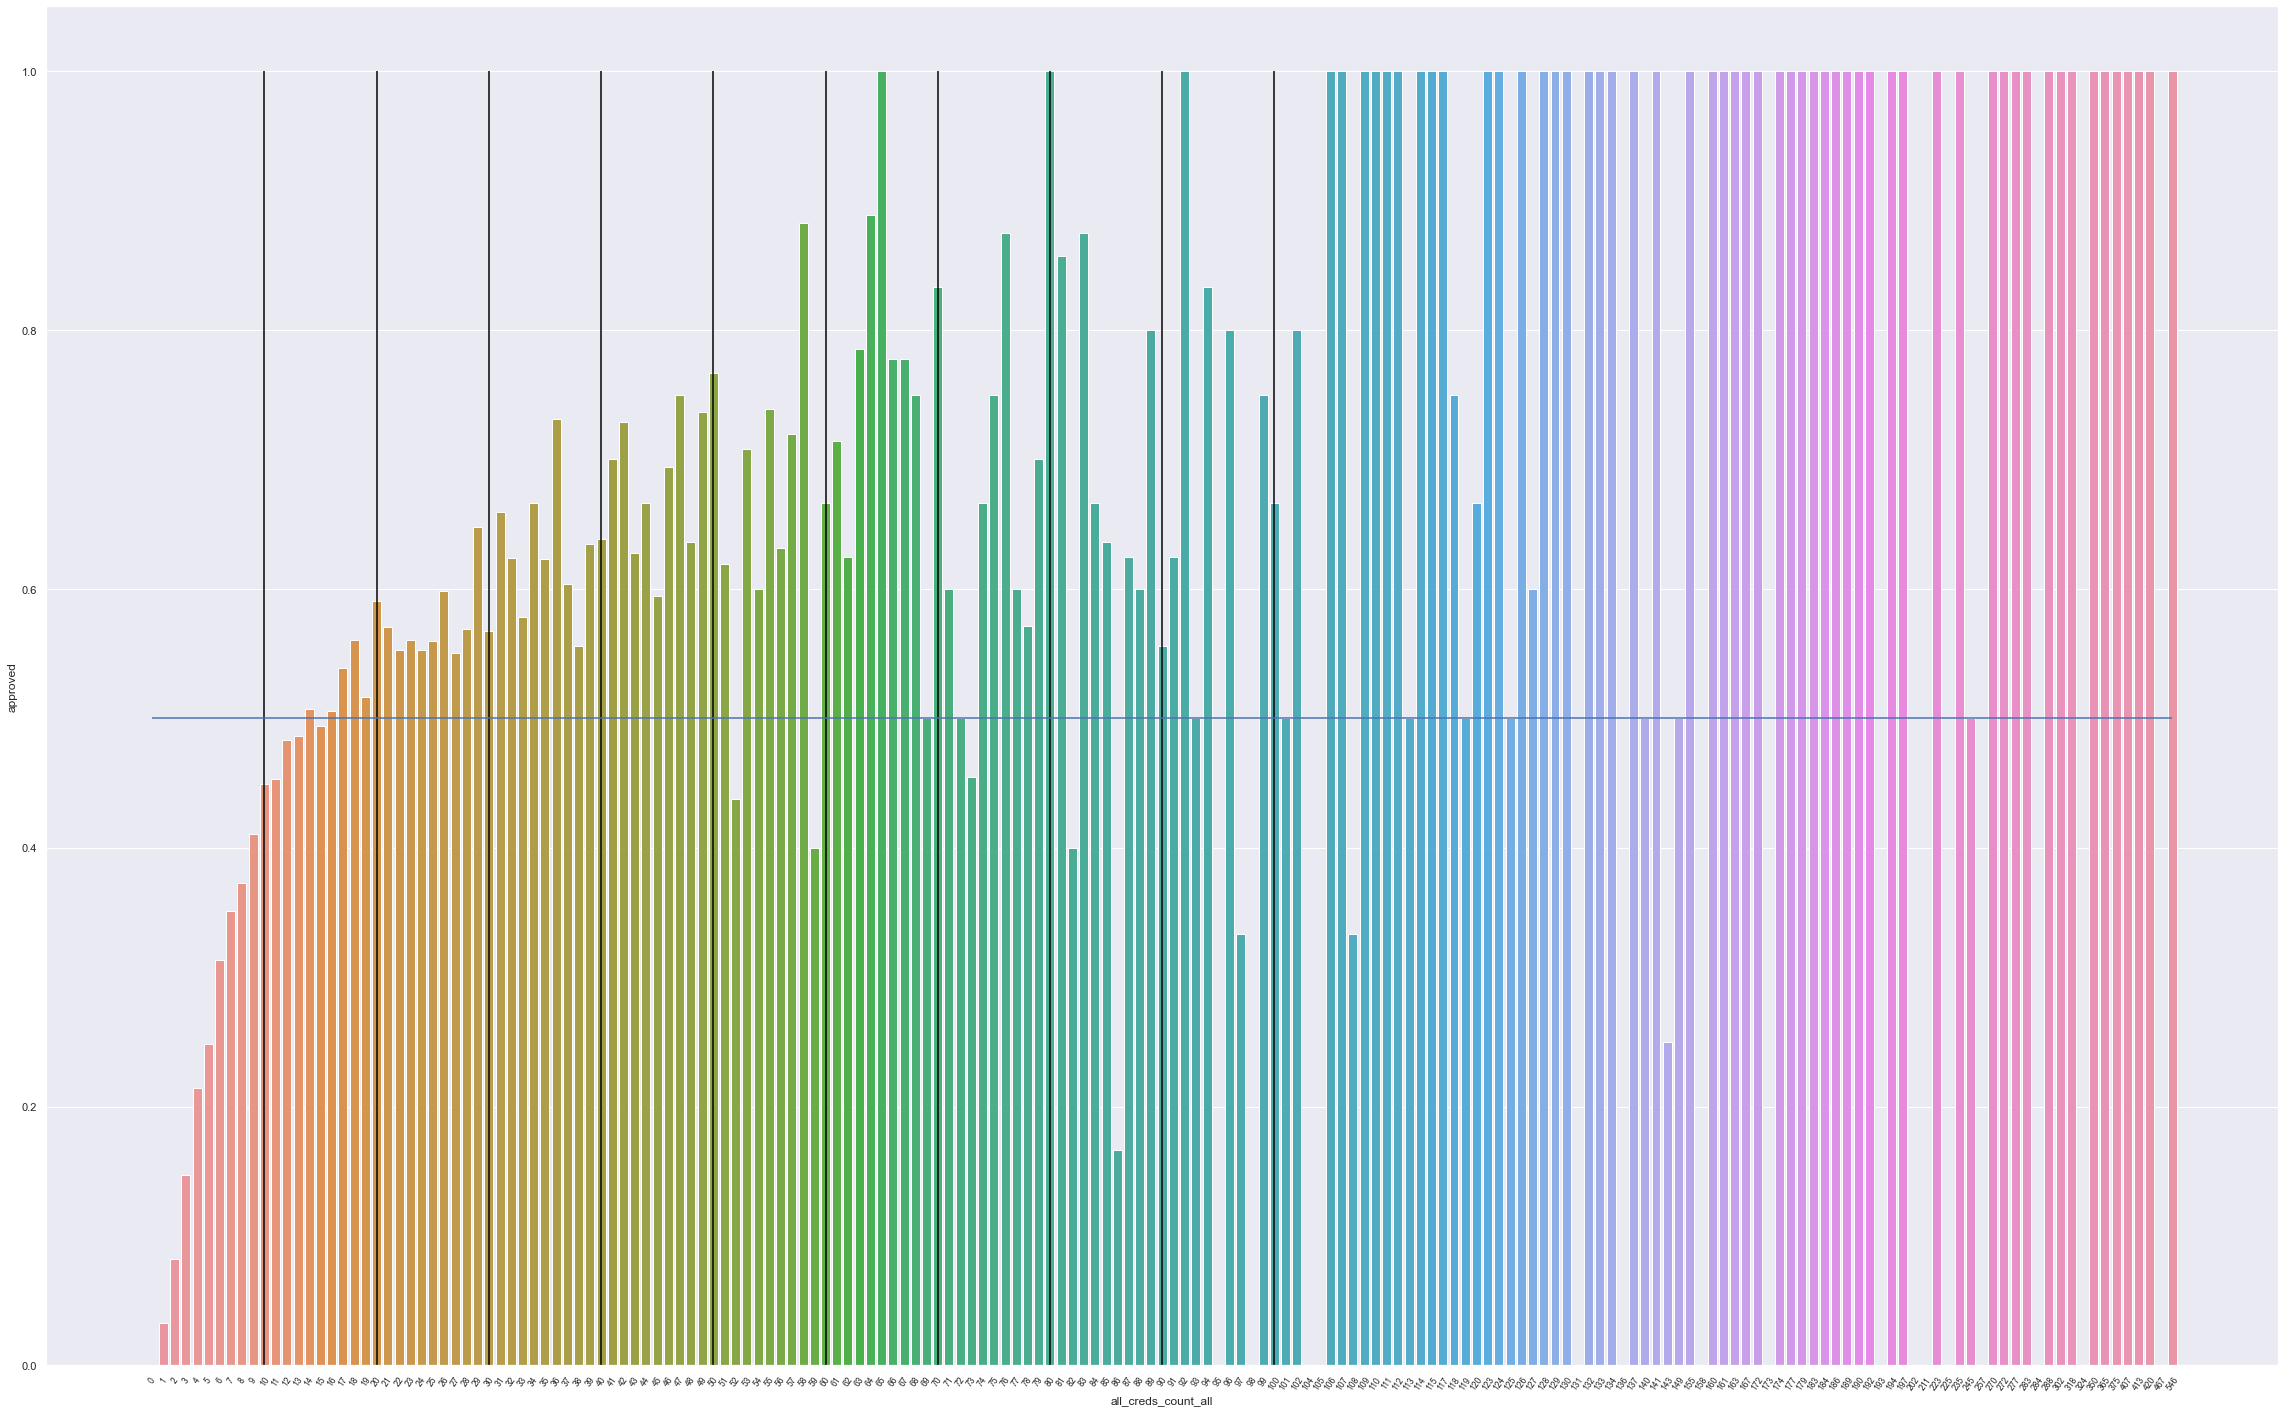

In [192]:
ax = sns.barplot(x=df['all_creds_count_all'], y=df['approved'], ci=None) #ci - confidence interval
ax.set_xticklabels(ax.get_xticklabels(), size=8.5, rotation = 55)
ax.vlines([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ymin=0, ymax = 1, colors='black')
ax.hlines([0.5], xmin=0, xmax = 180)

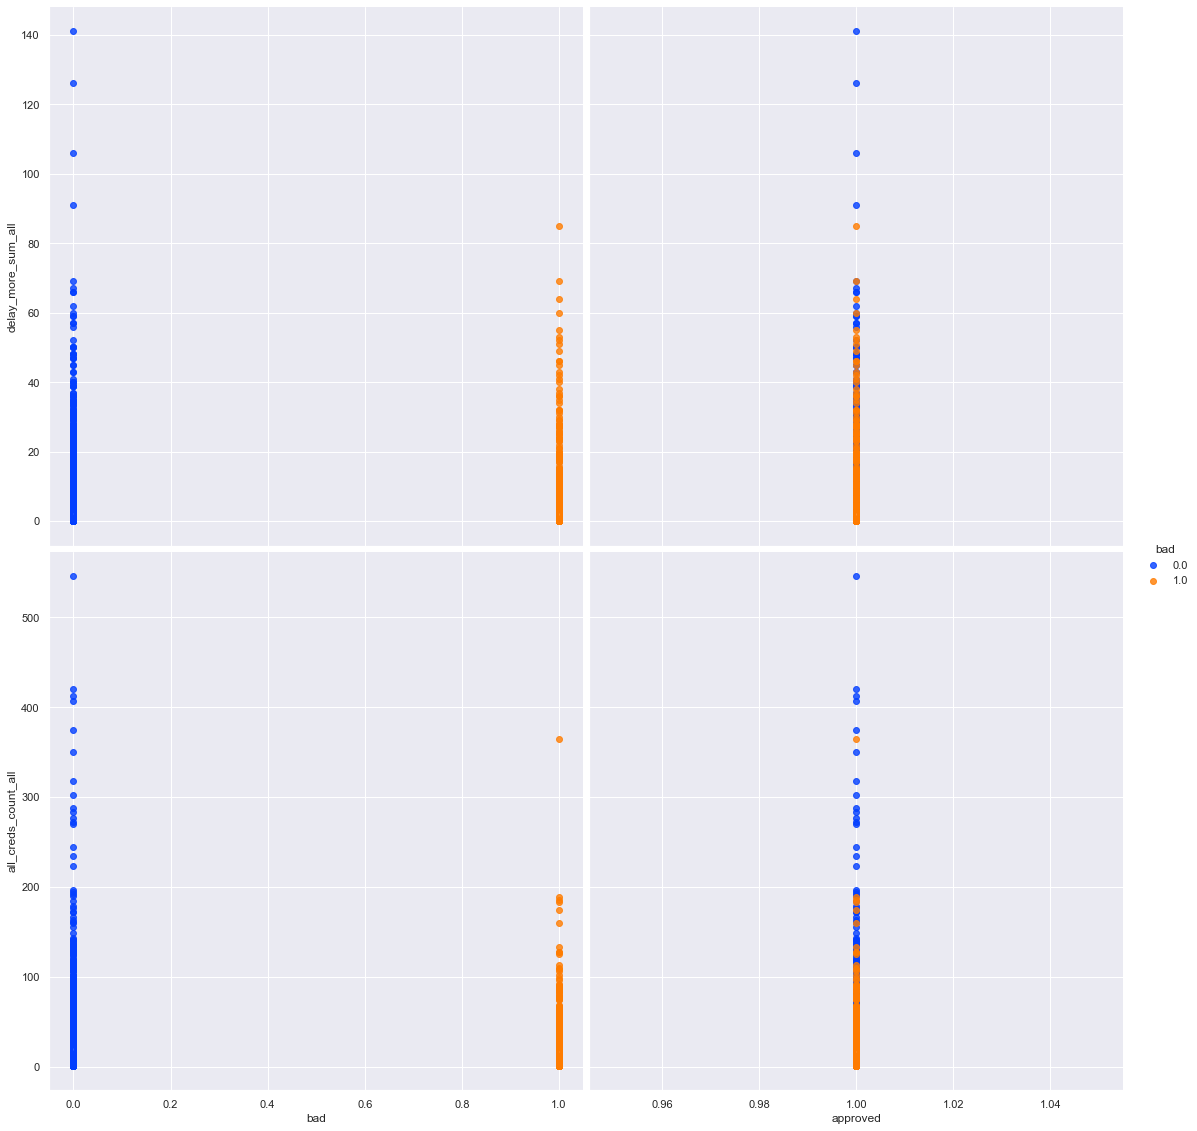

In [91]:
sns.pairplot(dff,
    hue='bad',
    y_vars=['delay_more_sum_all', 'all_creds_count_all'],
    x_vars=['bad', 'approved'],
    kind='reg',
    palette='bright',
    height=8)

***

In [95]:
kopa = df.iloc[list(np.where(df['bad'] == 0)[0])].median() - df.iloc[list(np.where(df['bad'] == 1)[0])].median()
kopa[[
    'all_active_creds_sum_all',
    'all_closed_creds_sum_all',
    'mfo_cred_mean_sum_3lm',
    'all_closed_creds_sum_ly',
    'mfo_inqs_count_month',
    'all_creds_count_lm',
    'cred_sum_cc_ly'
]]

all_active_creds_sum_all       22.5
all_closed_creds_sum_all    14613.0
mfo_cred_mean_sum_3lm           0.0
all_closed_creds_sum_ly      7000.0
mfo_inqs_count_month            0.0
all_creds_count_lm              0.0
cred_sum_cc_ly                  0.0
dtype: float64

In [13]:
#len(    list( set(not_a_single_payment).intersection(bad)) ) #список совпадений x и y (невернувших кредит среди тех, у кого ни одного платежа по текущим кредитам)

In [14]:
#len(    list(set(not_a_single_payment).intersection(good))  ) #вернувшие кредит среди тех, у кого ни одного платежа по текущим кредитам

In [15]:
# sns.violinplot(data=df.iloc[:, 1:], x='cred_sum_cc_all', y='all_closed_creds_sum_all', 
#     hue='approved', height=8.27, aspect=11.7/8.27) #тоже плохо, но пойдет как шаблон

In [ ]:
sns.heatmap(df.iloc[    list(np.where(dff['approved'] == 1)[0])  
    ].corr(), vmin=0.35, annot= True, fmt='.1g')                       #где bad = 1 (кредит был выдан, просрочен)  bd = list(np.where(dff['bad'] == 1)[0])

Кредит выдан, но просрочен

In [50]:
df.columns

Index(['order_id', 'cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'bad', 'approved'],
      dtype='object')

In [ ]:
sns.scatterplot(x = dff['order_id'], y = dff['approved'])

In [34]:
df[['order_id', 'bad', 'approved']] #можно выбрать несколько колонок

,order_id,bad,approved
0,5498546,NaN,0
1,5498604,NaN,0
2,5498609,NaN,0
3,5498645,NaN,0
4,5498647,NaN,0
...,...,...,...
23111,6697173,NaN,0
23112,6697212,NaN,0
23113,6697215,NaN,0
23114,6697264,NaN,0


In [ ]:
sns.scatterplot(x = df['order_id'], y = df['region'], hue=df['bad']) #видно что много одобрений у id 618**** - 624**
plt.vlines(x=6180000, ymin=0, ymax=100, colors='black') #линии на 618
plt.vlines(x=6420000, ymin=0, ymax=100, colors='black') # и 642 для наглядности

In [ ]:
sns.pairplot(df.iloc[    list(np.where(dff['approved'] == 1)[0])  
    ].corr(), vmin=0.35, annot= True, fmt='.1g')                 

In [ ]:
sns.pairplot(df.iloc[    
    list(np.where(dff['month_income'] < 10000)[0])  
    ], height=8, corner=True, hue='bad')

In [184]:
df.iloc[    
    list(np.where(dff['month_income'] < 10000)[0])  
    ]

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
84,5502219,258000.1,2,114601,8,0.00,303098,5,0.1,257236.49,...,0.00,1,0.00,0,3,3,0,50,0.0,1
87,5502290,0.0,0,0,0,0.00,0,9999,0.0,0.00,...,0.00,0,0.00,0,0,3,0,25,NaN,0
92,5502511,0.0,0,48969,0,0.00,0,9999,0.0,0.00,...,0.00,0,0.00,0,0,3,0,73,NaN,0
93,5502514,90000.0,3,65000,3,0.00,180000,10,0.0,165548.70,...,0.00,8,0.00,0,3,3,0,45,0.0,1
113,5503182,10000.0,1,2000,3,0.00,3000,6,0.0,3000.00,...,0.00,1,0.00,0,2,3,0,50,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21445,6621709,15000.0,0,0,2,0.00,0,9999,0.0,0.00,...,0.00,0,0.00,0,0,3,0,52,NaN,0
21501,6624144,110500.0,0,87604,3,0.00,10000,521,0.0,0.00,...,0.00,0,25948.98,0,0,3,0,45,NaN,0
21905,6641183,0.0,0,6192,3,0.00,0,9999,0.0,0.00,...,0.00,0,0.00,0,0,3,0,73,NaN,0
22184,6655415,0.0,0,38836,0,0.00,10000,670,0.0,0.00,...,0.00,0,0.00,0,0,3,0,78,NaN,0


In [ ]:
sns.pairplot((dff.iloc[:, 20:25].drop(columns=['region','bad'])), height=4, hue='approved')

In [ ]:
#sns.kdeplot(y = df['month_income'], x= df['work_code'], height=2,corner =True, hue=df['bad'], fill=True, levels=5) #3ий work_code меньше 10к зп и молодцы

In [ ]:
#sns.pairplot(df[['order_id','rerion',  'bad']], height=8,corner =True, hue='bad', kind='kde') #видно что много одобрений у id 618**** - 624**

In [232]:
df.iloc[list(np.where((df['work_code'] == 3))[0])][['month_income','bad', 'approved']].describe()

,month_income,bad,approved
count,4834.000000,1100.000000,4834.000000
mean,30008.274721,0.253636,0.227555
std,15828.023018,0.435290,0.419297
min,0.000000,0.000000,0.000000
25%,20000.000000,0.000000,0.000000
50%,35000.000000,0.000000,0.000000
75%,35000.000000,1.000000,0.000000
max,60000.000000,1.000000,1.000000


In [ ]:
df.iloc[list(np.where((dff['bad'] == 1))[0])].describe() #разница бэдов=1 и бэдов=1 в среднем через describe

In [ ]:
df.iloc[list(np.where((dff['bad'] == 0))[0])].describe() #разница бэдов=1 и бэдов=1 в среднем через describe

In [ ]:
df.iloc[list(np.where(df['mfo_cred_mean_sum_3lm'] == 0)[0])][['mfo_cred_mean_sum_3lm','bad','approved']].describe() #среднее по кредитам за последиие 3 месяца, тут - были ли они вообще

In [ ]:
df.iloc[list(np.where(df['mfo_cred_mean_sum_3lm'] > 0)[0])][['mfo_cred_mean_sum_3lm','bad','approved']].describe() #среднее по кредитам за последиие 3 месяца, тут - были ли они вообще

In [105]:
xer = df.iloc[list(np.where(df['all_closed_creds_sum_ly'] == 1483))[0]]

In [112]:
xer.iloc[list(np.where(xer['approved'] == 1))[0]][['all_closed_creds_sum_ly','approved', 'bad']].value_counts()

all_closed_creds_sum_ly  approved  bad
1483                     1         0.0    31
                                   1.0    11
dtype: int64

Моделька

In [12]:
from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.model_selection import train_test_split


In [13]:
rs = 1385

In [14]:
dff = dff.dropna()

In [15]:
dff = dff.drop(columns='cred_sum_debt_all_all')

In [16]:
target = dff['bad']

In [17]:
dff = dff.drop(columns=['bad', 'approved','order_id'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, train_size=0.95, test_size=0.05, random_state=rs)

In [19]:
cat_features = ['work_code', 'region']

In [20]:
pool = Pool(X_train, y_train, cat_features=cat_features, feature_names=list(X_train.columns))

In [267]:
#grid = {'learning_rate': [0.03, 0.05, 0.1],
#        'depth': [2, 4, 6, 10],
#        'l2_leaf_reg': [1, 3, 5, 7, 9]} чем глубже, тем сильнее переобучение, тем хуже тест

grid = {'iterations': [300, 500, 1000], #, 1000, 2500],
        'learning_rate': [0.03, 0.05],
        'depth': [2, 4, 6],
        'random_state':[rs],
        'metric_period':[250],
        'logging_level':['Silent']}

In [ ]:
gscb = CatBoostClassifier()
gsresult = gscb.grid_search(grid, X=pool, plot=True)

In [273]:
params = gsresult['params'] 

In [275]:
gsresult

{'params': {'metric_period': 250,
  'depth': 4,
  'random_seed': 1385,
  'iterations': 300,
  'learning_rate': 0.03,
  'logging_level': 'Silent'},
 'cv_results': defaultdict(list,
             {'iterations': [0, 250, 299],
              'test-Logloss-mean': [0.6862833611948421,
               0.574581256803194,
               0.5745554577256468],
              'test-Logloss-std': [2.3162663595485287e-05,
               0.0026488579479770603,
               0.0028454054252746233],
              'train-Logloss-mean': [0.6861916832130625,
               0.5359225609082047,
               0.5286761178542063],
              'train-Logloss-std': [3.9860198128528315e-05,
               0.00024648052092316933,
               0.0005561370031703128]})}

In [21]:
cbc = CatBoostClassifier(iterations=300, learning_rate=0.03, depth=4, random_seed=1385, logging_level='Silent')
cbc.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
cbc2 = CatBoostClassifier(iterations=5000, learning_rate=0.05, depth=8, random_seed=1385, logging_level='Silent')
cbc2.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
a = cbc.feature_importances_ #первый классифаер

In [24]:
b = cbc2.feature_importances_#второй ПЕРЕОБУЧЕННЫЙ классифаер

In [25]:
c = dff.columns

In [26]:
sosok = pd.DataFrame()
sosok['a'] = a
sosok['b'] = b
sosok['c'] = c
sosok['d'] = ['Сумма кредитов по кредитным картам', 'Количество запросов на кредиты в другие в МФО','Сумма закрытых кредитов', 'Количество запросов на кредиты в банки', 'Максимальная просрочка за год', 'Денежная сумма всех активных кредитов', 'Количество дней с последнего займа в МФО',
    'Сумма лимитов кредитных карт, оформленных за последний год', 'Сумма закрытых кредитов за последний год', 'Средняя сумма МФО кредитов, выданных за 3m', 'Количество просрочек более чем на 90 дней по всем', 'Общее количество кредитов', 'Суммарное количество дней просрочки текущих активных кредитов',
    'Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца', 'Количество закрытых МФО кредитов, взятых за последний год', 'Сумма просрочек по кредитным картам', 'Количество кредитов на просрочке, взятых за last 3m', 'Количество кредитов, взятых за последний месяц',
    'Код профессии', 'Месячный доход', 'Регион']

In [125]:
sosok.sort_values(by=['b'], ascending=False)

,a,b,c,d
20,7.917794,12.963582,region,Регион
5,5.523752,9.145701,all_active_creds_sum_all,Денежная сумма всех активных кредитов
2,4.242894,8.326008,all_closed_creds_sum_all,Сумма закрытых кредитов
18,11.555119,8.057935,work_code,Код профессии
9,4.628952,7.577755,mfo_cred_mean_sum_3lm,"Средняя сумма МФО кредитов, выданных за 3m"
3,2.461938,7.226434,bank_inqs_count_quarter,Количество запросов на кредиты в банки
0,2.257415,6.579274,cred_sum_cc_all,Сумма кредитов по кредитным картам
8,9.616167,6.082713,all_closed_creds_sum_ly,Сумма закрытых кредитов за последний год
11,2.622224,5.222219,all_creds_count_all,Общее количество кредитов
1,11.330668,4.310161,mfo_inqs_count_month,Количество запросов на кредиты в другие в МФО


a - коэфы при фичах у нормально обученного классификатора <br/>
b - коэфы у намеренно переобученного классификатора <br/>
Обучены на классификацию bad

In [117]:
dff = df.copy()
dff[['all_closed_creds_sum_all', 'all_active_creds_sum_all', 'cred_sum_debt_all_all', ]] = dff[['all_closed_creds_sum_all', 'all_active_creds_sum_all', 'cred_sum_debt_all_all', ]].round(decimals=-3)
dff[['mfo_last_days_all', 'cred_max_overdue_max_3lm', 'cred_day_overdue_all_sum_all']] = dff[['mfo_last_days_all', 'cred_max_overdue_max_3lm', 'cred_day_overdue_all_sum_all']].round(decimals=-2)

Моделька классификатор для approved

In [118]:
dff = dff.drop(columns=['cred_sum_debt_all_all', 'bad', 'order_id'])
target = dff['approved']
dff = dff.drop(columns='approved')
X_train, X_test, y_train, y_test = train_test_split(dff, target, train_size=0.95, test_size=0.05, random_state=rs)
cat_features = ['work_code', 'region']
pool = Pool(X_train, y_train, cat_features=cat_features, feature_names=list(X_train.columns))

In [119]:
cbc3 = CatBoostClassifier(iterations=300, learning_rate=0.03, depth=4, random_seed=1385, logging_level='Silent')
cbc.fit(pool, plot=True)

cbc4 = CatBoostClassifier(iterations=5000, learning_rate=0.05, depth=8, random_seed=1385, logging_level='Silent')
cbc2.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [120]:
d = cbc.feature_importances_ #первый классифаер
e = cbc2.feature_importances_#второй ПЕРЕОБУЧЕННЫЙ классифаер
f = dff.columns
sosok1 = pd.DataFrame()
sosok1['a'] = d
sosok1['b'] = e
sosok1['c'] = f
sosok1['d'] = ['Сумма кредитов по кредитным картам', 'Количество запросов на кредиты в другие в МФО','Сумма закрытых кредитов', 'Количество запросов на кредиты в банки', 'Максимальная просрочка за год', 'Денежная сумма всех активных кредитов', 'Количество дней с последнего займа в МФО',
    'Сумма лимитов кредитных карт, оформленных за последний год', 'Сумма закрытых кредитов за последний год', 'Средняя сумма МФО кредитов, выданных за 3m', 'Количество просрочек более чем на 90 дней по всем', 'Общее количество кредитов', 'Суммарное количество дней просрочки текущих активных кредитов',
    'Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца', 'Количество закрытых МФО кредитов, взятых за последний год', 'Сумма просрочек по кредитным картам', 'Количество кредитов на просрочке, взятых за last 3m', 'Количество кредитов, взятых за последний месяц',
    'Код профессии', 'Месячный доход', 'Регион']

In [124]:
sosok1.sort_values(by='b', ascending=False)

,a,b,c,d
12,32.677573,10.473591,cred_day_overdue_all_sum_all,Суммарное количество дней просрочки текущих ак...
20,0.019572,9.504745,region,Регион
5,5.852429,8.062407,all_active_creds_sum_all,Денежная сумма всех активных кредитов
2,4.490736,7.685468,all_closed_creds_sum_all,Сумма закрытых кредитов
11,12.000302,7.297244,all_creds_count_all,Общее количество кредитов
10,8.498030,6.268948,delay_more_sum_all,Количество просрочек более чем на 90 дней по всем
3,3.565815,5.840570,bank_inqs_count_quarter,Количество запросов на кредиты в банки
0,2.584674,5.780241,cred_sum_cc_all,Сумма кредитов по кредитным картам
18,0.076591,5.440926,work_code,Код профессии
8,8.432062,4.643692,all_closed_creds_sum_ly,Сумма закрытых кредитов за последний год


a - коэфы при фичах у нормально обученного классификатора <br/>
b - коэфы у намеренно переобученного классификатора <br/>
Обучены на классификацию approved